In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
%matplotlib inline

<Axes: >

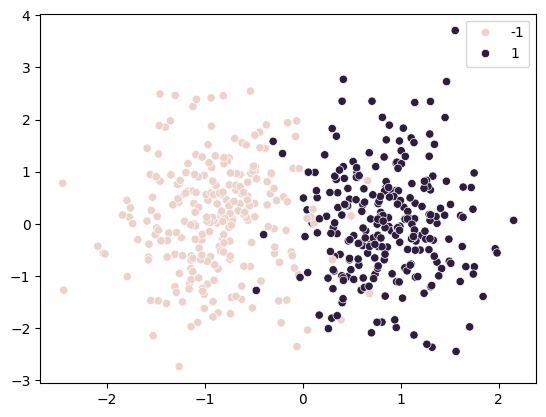

In [3]:
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
x = preprocessing.scale(x)

x_test=x[:500]
y_test=y[:500]
x=x[500:]
y=y[500:]

y=np.where(y==0,-1,1)
y_test=np.where(y_test==0,-1,1)

sns.scatterplot(x=x[:,0], y=x[:,1], hue=y.reshape(-1))

In [4]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(x, y)

y_pred = model.predict(x_test)


In [5]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.97


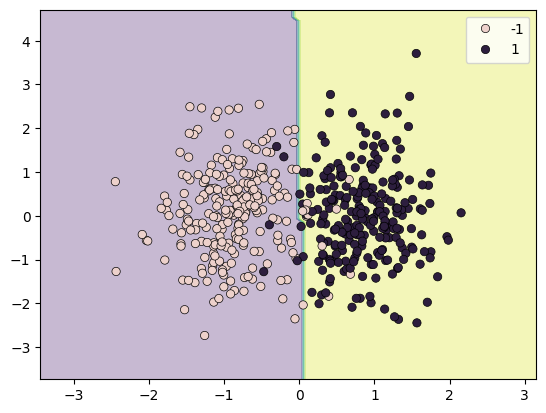

In [6]:
xx, yy = np.meshgrid(np.linspace(x[:,0].min()-1, x[:,0].max()+1, 100),
                     np.linspace(x[:,1].min()-1, x[:,1].max()+1, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y.reshape(-1), edgecolor="k")
plt.show()


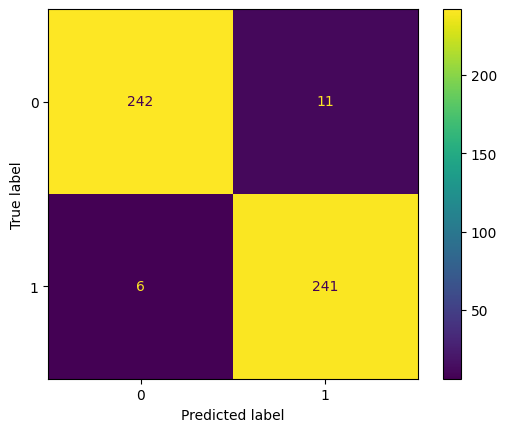

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

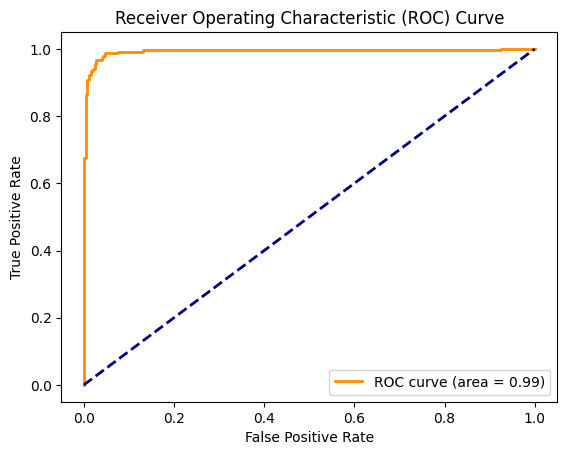

In [8]:
from sklearn.metrics import roc_curve, auc

y_score = model.decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(x, y)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.1, 'kernel': 'linear'}


In [10]:
best_model = SVC(C=0.1, kernel='linear')
best_model.fit(x, y)

y_pred_best = best_model.predict(x_test)


accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized Model Accuracy: {accuracy_best:.2f}")


Optimized Model Accuracy: 0.97


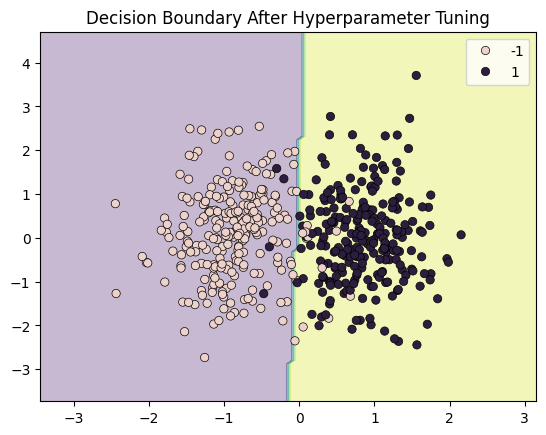

In [11]:
xx, yy = np.meshgrid(np.linspace(x[:,0].min()-1, x[:,0].max()+1, 100),
                     np.linspace(x[:,1].min()-1, x[:,1].max()+1, 100))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y.reshape(-1), edgecolor="k")
plt.title("Decision Boundary After Hyperparameter Tuning")
plt.show()


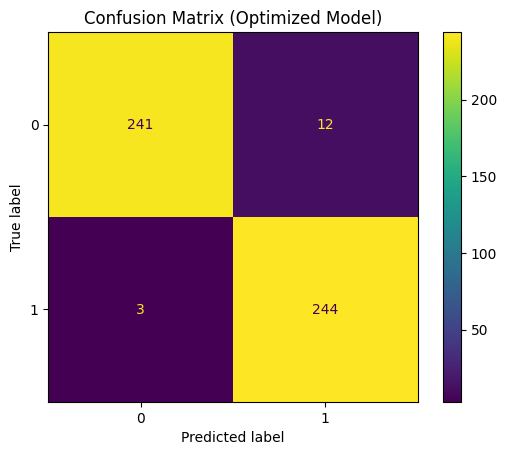

In [12]:
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot()
plt.title("Confusion Matrix (Optimized Model)")
plt.show()


In [13]:
train_accuracy = accuracy_score(y, best_model.predict(x))
test_accuracy = accuracy_score(y_test, best_model.predict(x_test))

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Train Accuracy: 0.96
Test Accuracy: 0.97


In [14]:
from sklearn.utils import resample

x_more, y_more = resample(x, y, n_samples=2000, random_state=42)
x = np.vstack((x, x_more))
y = np.hstack((y, y_more))

best_model.fit(x, y)


SVC(C=0.1, kernel='linear')

In [15]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, x, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


Cross-validation scores: [0.966 0.968 0.972 0.968 0.97 ]
Mean CV Accuracy: 0.97


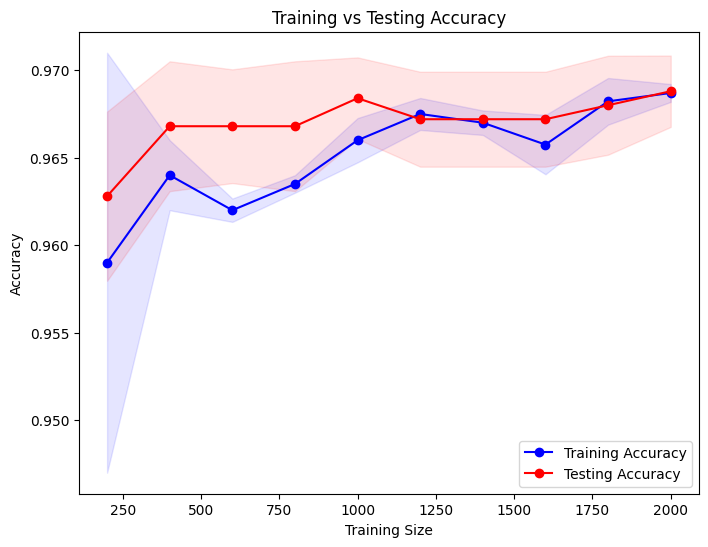

In [17]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, x, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)

plt.plot(train_sizes, test_mean, 'o-', color="red", label="Testing Accuracy")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.1)

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.legend(loc="best")
plt.show()
